In [10]:
# general purpose modules for handling data
import numpy as np
import pandas as pd

# for loading telo data column containing individual telomere length values
from ast import literal_eval

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# custom module for handling telomere length data
import telomere_methods_astros as telo_ma

# statistics
import scipy.stats as stats
import scikit_posthocs as sp

In [11]:
# setting all graphs to have darkgrid style w/ black edges for axes elements
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

# Analyzing Mean Telomere Lengths (FISH)
---

## Reading in telomere FISH data

In [96]:
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
astro_telos_per_cell_df = pd.read_csv('../data/compiled and processed data/exploded_cells_astros_df.csv')

In [14]:
ctrl_telos_per_cell_df = pd.read_csv('../data/compiled and processed data/exploded_cells_ctrl_df.csv')
ctrl_telos_per_cell_df['flight status'] = 'Controls'

## Mean Telomere Lengths for 11 Astros: Visualizations, Stats

First.. let's see how mean telomere length changes w/ respect to spaceflight when all 11 astronauts are averaged together for pre-, mid-, & post-flight timepoints

In [15]:
concat_astros_ctrl_per_cell = pd.concat([astro_telos_per_cell_df.assign(dataset='set1'),
    ctrl_telos_per_cell_df.assign(dataset='set2')], sort=False)

Text(0, 0.5, 'Mean Telomere Length (per cell)')

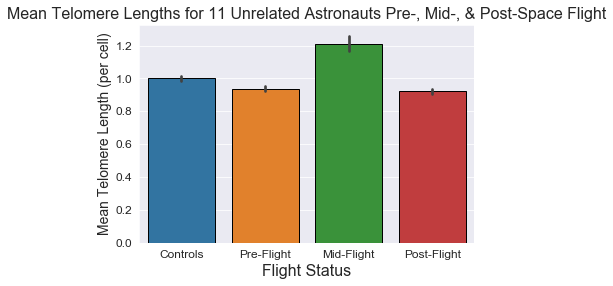

In [16]:
ax = sns.barplot(x='flight status', y='telo data per cell', data=concat_astros_ctrl_per_cell, 
            order=['Controls', 'Pre-Flight', 'Mid-Flight', 'Post-Flight'])

ax.set_title('Mean Telomere Lengths for 11 Unrelated Astronauts Pre-, Mid-, & Post-Space Flight', fontsize=16)
ax.set_xlabel('Flight Status', fontsize=16)
ax.set_ylabel('Mean Telomere Length (per cell)', fontsize=14)

In [17]:
# one-way anova between mean telomere lengths per timepoint

df1 = astro_telos_per_cell_df

pre_flight = df1[df1['flight status'] == 'Pre-Flight']['telo data per cell']
mid_flight = df1[df1['flight status'] == 'Mid-Flight']['telo data per cell']
post_flight = df1[df1['flight status'] == 'Post-Flight']['telo data per cell']
                      
print(stats.f_oneway(pre_flight, mid_flight, post_flight))
sp.posthoc_ttest(df1, val_col='telo data per cell', group_col='flight status')

F_onewayResult(statistic=95.22257773598575, pvalue=1.8245401312740491e-40)


,Pre-Flight,Mid-Flight,Post-Flight
Pre-Flight,-1.000000e+00,3.346597e-34,1.628171e-01
Mid-Flight,3.346597e-34,-1.000000e+00,2.202148e-38
Post-Flight,1.628171e-01,2.202148e-38,-1.000000e+00


Mean telomere length increases as a function of spaceflight. Furthermore, mean telomere length for astronauts overall appears to be slightly shorter after spaceflight.. Let's see what telomere length looks like for just our astronauts w/ inflight data

## Mean Telomere Lengths for 3 Astros: Visualizations, Stats

In [18]:
only_inflight_astros_df = (astro_telos_per_cell_df[astro_telos_per_cell_df
                                                   ['astro id'].isin(['2171', '1536', '5163'])].copy())

In [19]:
only_inflight_concat_astros_ctrl_per_cell = pd.concat([only_inflight_astros_df.assign(dataset='set1'),
    ctrl_telos_per_cell_df.assign(dataset='set2')], sort=False)

Text(0, 0.5, 'Mean Telomere Length (per cell)')

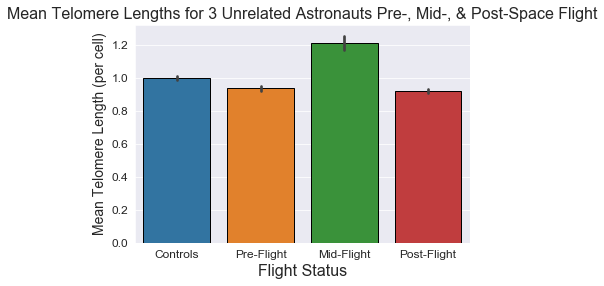

In [20]:
ax = sns.barplot(x='flight status', y='telo data per cell', data=concat_astros_ctrl_per_cell, 
            order=['Controls', 'Pre-Flight', 'Mid-Flight', 'Post-Flight'])

ax.set_title('Mean Telomere Lengths for 3 Unrelated Astronauts Pre-, Mid-, & Post-Space Flight', fontsize=16)
ax.set_xlabel('Flight Status', fontsize=16)
ax.set_ylabel('Mean Telomere Length (per cell)', fontsize=14)

In [21]:
# one-way anova between mean telomere lengths per timepoint

df2 = only_inflight_astros_df

pre_flight = df2[df2['flight status'] == 'Pre-Flight']['telo data per cell']
mid_flight = df2[df2['flight status'] == 'Mid-Flight']['telo data per cell']
post_flight = df2[df2['flight status'] == 'Post-Flight']['telo data per cell']
                      
print(stats.f_oneway(pre_flight, mid_flight, post_flight))
sp.posthoc_ttest(df2, val_col='telo data per cell', group_col='flight status', p_adjust='holm')

F_onewayResult(statistic=45.99020079452758, pvalue=1.993327036886486e-19)


,Pre-Flight,Mid-Flight,Post-Flight
Pre-Flight,-1.000000e+00,8.546930e-13,3.601055e-01
Mid-Flight,8.546930e-13,-1.000000e+00,2.204878e-15
Post-Flight,3.601055e-01,2.204878e-15,-1.000000e+00


These 3 astronauts are our only individuals w/ inflight data, so the mid-flight mean telomere length has remained the same. The pre-/post-flight data has the same relationship compared to the data for all 11 astronauts: post-flight mean telomere length is *slightly* shorter.

Now.. our inflight astronauts had blood samples collected at different flight days. Let's first parse out the mean telomere length data per astronaut.

## Examining Mean Telomere Length @ Mid-Flight 1 vs. 2

Text(0.5, 1.0, 'Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid-, Post-Flight')

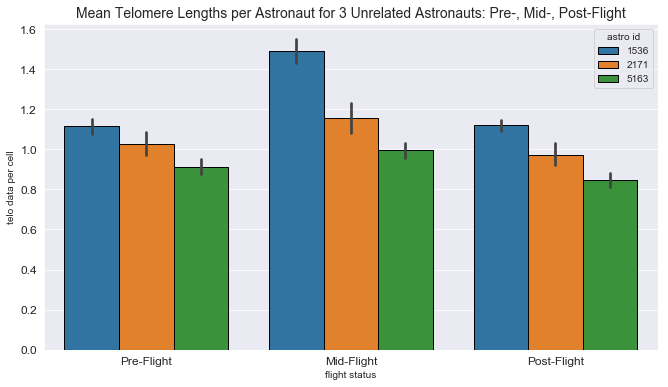

In [22]:
fig = plt.figure(figsize=(11,6))
ax = sns.barplot(x='flight status', y='telo data per cell', order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'], 
                   hue='astro id', data=only_inflight_astros_df, dodge=True)

ax.set_title('Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid-, Post-Flight', fontsize=14)

Even when considered separately, for each astronaut the average of mean telomere length for their samples taken midflight was always longer than the average of samples pre-flight. As well, the average of mean telomere length for samples post-flight were slightly shorter. Interestingly, dso2171 looks to have similar mean telomere length for both blood draws.

Now we must consider if mean telomere length increases as a function of *duration in spaceflight*. We can do so b.c astros 1536&5163 samples were collected at FD90 & 140, while astro 2171 samples were collected at FD45 & 260. Let's first parse out the two mid-flight timepoints, then examine mid 1 & mid 2 for each astronaut

In [23]:
only_inflight_astros_df['flight status mid split'] = only_inflight_astros_df.loc[:, 'timepoint'].apply(lambda row: telo_ma.mid_split(row))
ctrl_telos_per_cell_df['flight status mid split'] = 'Controls'

In [24]:
only_inflight_concat_df = pd.concat([only_inflight_astros_df.assign(dataset='set1'),
                                     ctrl_telos_per_cell_df.assign(dataset='set2')], sort=False)

Text(0.5, 1.0, 'Mean Telomere Lengths for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight')

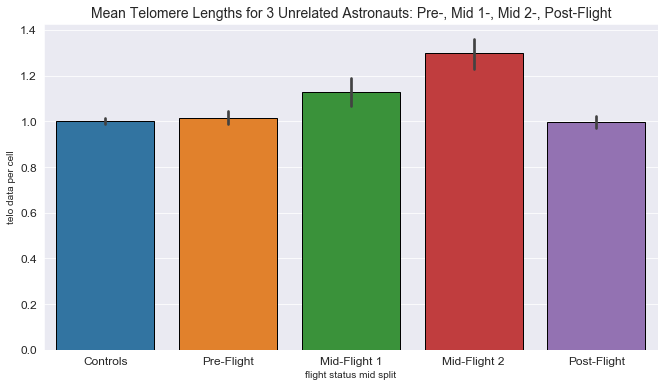

In [25]:
fig = plt.figure(figsize=(11,6))
ax = sns.barplot(x='flight status mid split', y='telo data per cell', 
                   order=['Controls', 'Pre-Flight', 'Mid-Flight 1', 'Mid-Flight 2', 'Post-Flight'], 
                 data=only_inflight_concat_df)

ax.set_title('Mean Telomere Lengths for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight', fontsize=14)

The average of mean telomere lengths for mid-flight 2 is certainly higher than for mid-flight 1. There may be some relationship between telomere lengthening and spaceflight duration. However, telomere length may have a normal biological upper bound, though numerically undefined, thus it's unlikely that telomere length would increase indefinitely via spaceflight. Let's see how the data looks per astronaut.

Text(0.5, 1.0, 'Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight')

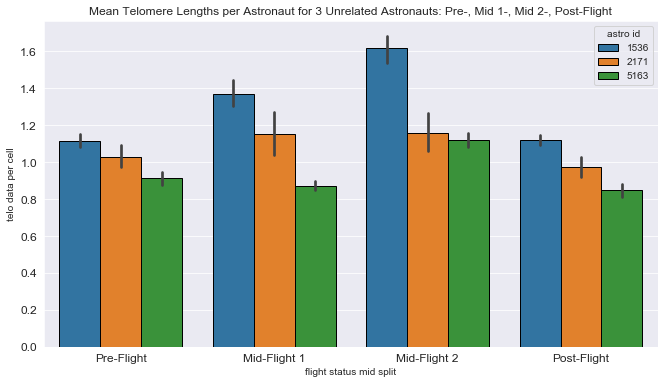

In [26]:
fig = plt.figure(figsize=(11,6))
ax = sns.barplot(x='flight status mid split', y='telo data per cell', order=['Pre-Flight', 'Mid-Flight 1', 'Mid-Flight 2', 'Post-Flight'], 
                   hue='astro id', data=only_inflight_astros_df, dodge=True)

ax.set_title('Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight')

Astros 1536 & 5163 blood draws occured at FD90 & FD140, and both experienced an increase in mean telomere length at mid-flight 1 relative to pre-flight, and experienced an additional increase over mid-flight 1 at mid-flight 2.

Astro 2171 had blood draws at FD45 & FD260, and while mid-flight 1 had increased mean telomere length relative to pre-flight, mid-flight 2 was not. Rather, mid-flight 2 was numerically close to mid-flight 1. Altogether, mean telomere length does not appear to increase indefinitely with spaceflight. Our limited # of datapoints suggest that while mean telomere length increases mid-flight, it does not increase indefinitely.

Let's look at individual telomere lengths.

# Analyzing Individual Telomere Length Distributions (FISH)

## Reading in individual telomere length data

In [75]:
exploded_telos_astro_df = pd.read_csv('../data/compiled and processed data/exploded_telos_astros_df.csv')
exploded_telos_astro_df['astro id'] = exploded_telos_astro_df['astro id'].astype('str')

exploded_telos_astro_df.head(4)

,astro number,astro id,timepoint,flight status,telo means,telo data exploded
0,1,5163,L-270,Pre-Flight,87.672120,74.607417
1,1,5163,L-180,Pre-Flight,101.077756,87.654527
2,1,5163,L-60,Pre-Flight,128.599235,120.046776
3,1,5163,FD90,Mid-Flight,101.183129,96.508520


In [74]:
# taking only midflight astros
exploded_telos_only_mid_astros_df = exploded_telos_astro_df[
                              (exploded_telos_astro_df['astro id'] == '5163') |
                              (exploded_telos_astro_df['astro id'] == '1536') |
                              (exploded_telos_astro_df['astro id'] == '2171')].copy()

exploded_telos_only_mid_astros_df.shape

(132480, 6)

In [72]:
exploded_telos_only_mid_astros_df['flight status mid split'] = exploded_telos_only_mid_astros_df['timepoint'].apply(lambda row: telo_ma.mid_split(row))

We've seen that mean telomere length increases during spaceflight. Now let us define short&long telomeres and visualize individual telomere length distributions per astronaut for timepoints most distal to spaceflight. 

To define short & long telomeres, we'll first find the earliest pre-flight samples for each astronaut. Then, in the individual telomere length distribution for that sample, we'll find the quartile boundary values for the bottom 25% of telos (short telos), middle 50%, and top 25% (long telos). The short, medium, and long telomeres will be colored yellow, blue, and pink respectively.

Once the quartile boundary values are established by the earliest pre-flight timepoint, the quartile boundary values will be used to color both midflight samples and the latest post-flight sample. In doing so, we can visualize and quantify the shifts of short/mid/long telomeres for each sample relative to the earliest timepoint. Now we have a means to discuss these classes of telomeres.

## Graphing Individual Telo Distributions 3 Inflight Astros

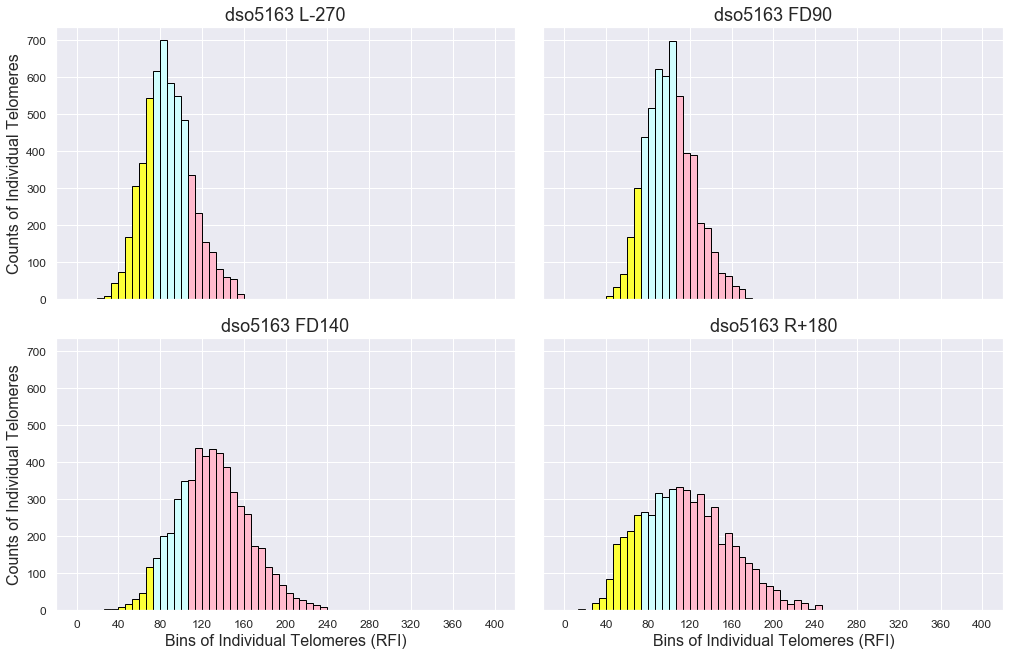

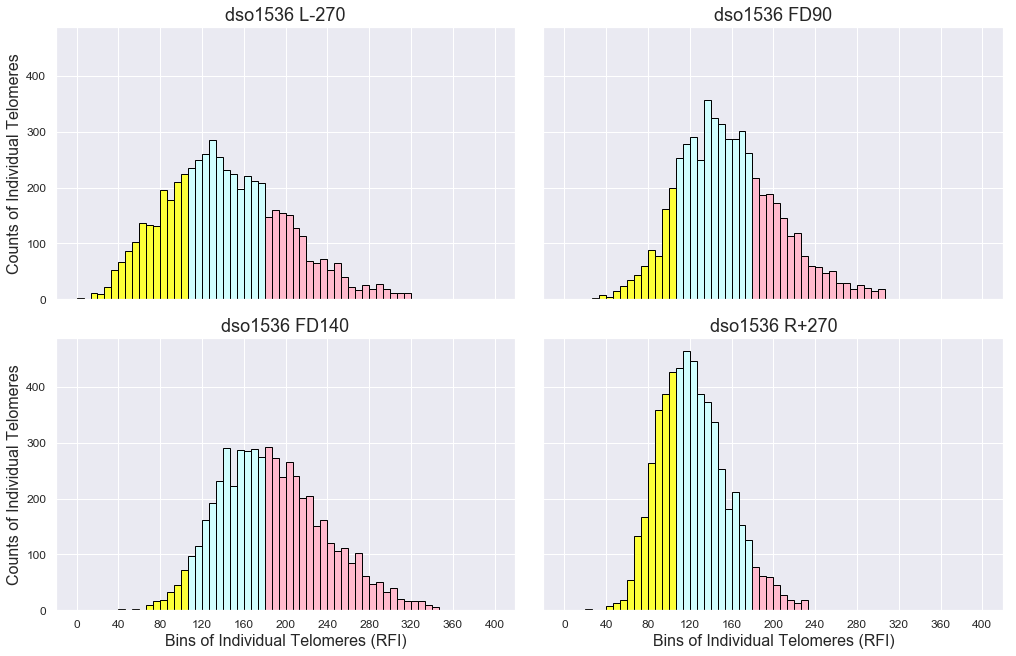

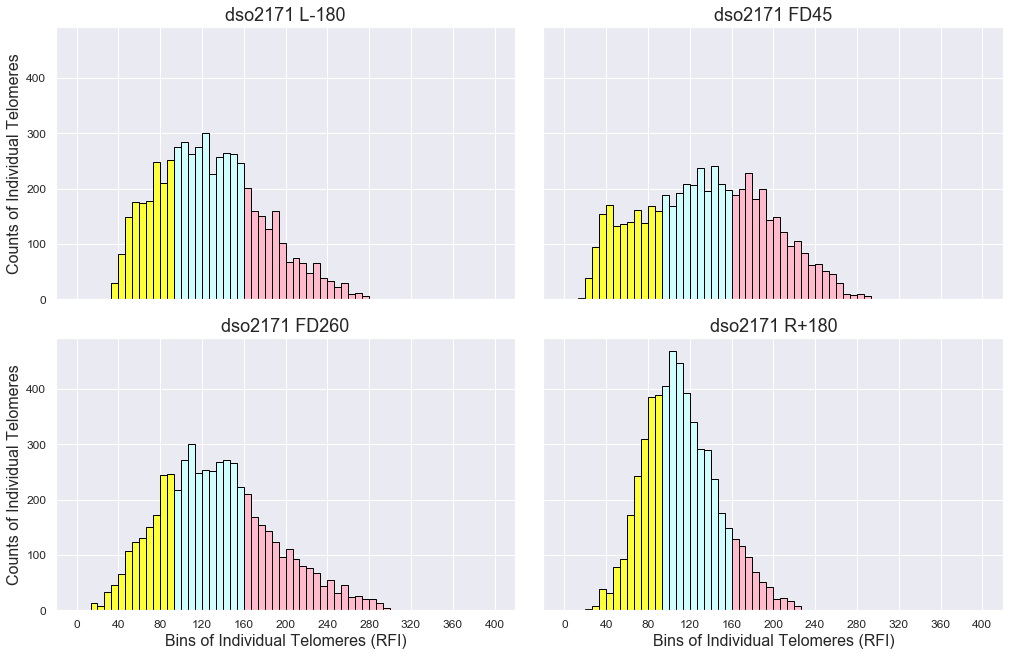

In [97]:
exploded_telos_only_mid_astros_df['astro id'] = exploded_telos_only_mid_astros_df['astro id'].astype('str')
astro_ids = list(exploded_telos_only_mid_astros_df['astro id'].unique())
telo_ma.make_histograms_colored_by_quartile_for_astronauts(exploded_telos_only_mid_astros_df, astro_ids)

In [98]:
# parsing out astronaut individual telomere length data for statistical analyses of changing distributions

dict_exploded_telos = {}

for astro_id in ['2171', '1536', '5163']:
    timepoints = []  
    
    if astro_id == '2171':    
        for timepoint in ['L-180', 'FD45', 'FD260', 'R+180']:
            exploded_telos_timepoint = dso2171_expl[dso2171_expl['timepoint'] == timepoint]['telo data exploded']
            timepoints.append([timepoint, exploded_telos_timepoint])
        dict_exploded_telos[astro_id] = timepoints
        
    elif astro_id =='1536':
        for timepoint in ['L-270', 'FD90', 'FD140', 'R+270']:
            exploded_telos_timepoint = dso2171_expl[dso2171_expl['timepoint'] == timepoint]['telo data exploded']
            timepoints.append([timepoint, exploded_telos_timepoint])
        dict_exploded_telos[astro_id] = timepoints
    
    elif astro_id =='5163':
        for timepoint in ['L-270', 'FD90', 'FD140', 'R+180']:
            exploded_telos_timepoint = dso2171_expl[dso2171_expl['timepoint'] == timepoint]['telo data exploded']
            timepoints.append([timepoint, exploded_telos_timepoint])
        dict_exploded_telos[astro_id] = timepoints

In [99]:
for key, value in dict_exploded_telos.items():
    astro_prename = dict_exploded_telos[key][0][0]
    astro_pre = dict_exploded_telos[key][0][1]
    
    astro_mid1name = dict_exploded_telos[key][1][0]
    astro_mid1 = dict_exploded_telos[key][1][1]
    
    astro_mid2name = dict_exploded_telos[key][2][0]
    astro_mid2 = dict_exploded_telos[key][2][1]
    
    astro_postname = dict_exploded_telos[key][3][0]
    astro_post =dict_exploded_telos[key][3][1]
    print(f'ASTRONAUT ID: {key}')

    telo_ma.statistics_between_timepoints(astro_pre, astro_mid1, astro_mid2, astro_post, 
        astro_prename, astro_mid1name, astro_mid2name, astro_postname)

ASTRONAUT ID: 2171
L-180  vs  FD45 MannwhitneyuResult(statistic=14028493.0, pvalue=2.8618244221912324e-13) 
 L-180  vs  FD260 MannwhitneyuResult(statistic=14225206.0, pvalue=8.093940362264684e-10) 
 FD45  vs  R+180 MannwhitneyuResult(statistic=11553652.0, pvalue=1.8925578259161497e-107) 
 FD45  vs  FD260 MannwhitneyuResult(statistic=14948962.5, pvalue=0.043677723748544915) 
 FD260  vs  R+180 MannwhitneyuResult(statistic=11514018.0, pvalue=9.99749849745642e-110) 
 L-180  vs  R+180 MannwhitneyuResult(statistic=12566804.5, pvalue=1.763372117035761e-57) 

ASTRONAUT ID: 1536
L-270  vs  FD90 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 
 L-270  vs  FD140 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 
 FD90  vs  R+270 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 
 FD90  vs  FD140 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 
 FD140  vs  R+270 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 
 L-270  vs  R+270 MannwhitneyuResult(statistic=0.0, pvalue=0.0) 

ASTRONAUT ID: 5163
L-270  vs  FD90 M

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:5001: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


Intriguingly, we see a *decrease* in short telos and an *increase* in long telos inflight. Furthermore, 2/3 astronauts experienced a remarkable increase in short telomeres post-flight. Now, let us quantify and visualize the #s of short/medium/long telomeres for the complete timecourse for these 3 unrelated astronauts.

## Counting individual short/long telos per quartile 3 Inflight Astros

In [36]:
melted_quartiles_astro_df = pd.read_csv('../data/compiled and processed data/melted_quartiles_astro_df.csv')

In [37]:
melted_quartiles_astro_df['astro id'] = melted_quartiles_astro_df['astro id'].astype('str')
melted_quartiles_astro_df.head(4)

,astro number,astro id,timepoint,flight status,telo data,telo means,relative Q,Q freq counts
0,1,5163,L-270,Pre-Flight,"[74.60741730704979, 101.70397594386903, 111.61...",87.672120,Q1,1384
1,1,5163,L-180,Pre-Flight,"[87.65452723020381, 86.83595055128633, 129.585...",101.077756,Q1,848
2,1,5163,L-60,Pre-Flight,"[120.04677581022386, 123.45472769796191, 126.3...",128.599235,Q1,259
3,1,5163,FD90,Mid-Flight,"[96.50851987971934, 84.8813899097895, 118.8940...",101.183129,Q1,472


In [38]:
# inflight astros w/ timepoints graphed above
df_m = melted_quartiles_astro_df.copy()

dso2171_quartiles = df_m[(df_m['astro id'] == '2171') &
                         (df_m['timepoint'].isin(['L-180', 'FD45', 'FD260', 'R+180']))]

dso1536_quartiles = df_m[(df_m['astro id'] == '1536') &
                         (df_m['timepoint'].isin(['L-270', 'FD90', 'FD140', 'R+270']))]

dso5163_quartiles = df_m[(df_m['astro id'] == '5163') &
                         (df_m['timepoint'].isin(['L-270', 'FD90', 'FD140', 'R+180']))]

mid_only_quartiles_df = pd.concat([dso2171_quartiles, dso1536_quartiles, dso5163_quartiles])

Text(0, 0.5, 'Individual Telos Freqs Within first time point Quartiles')

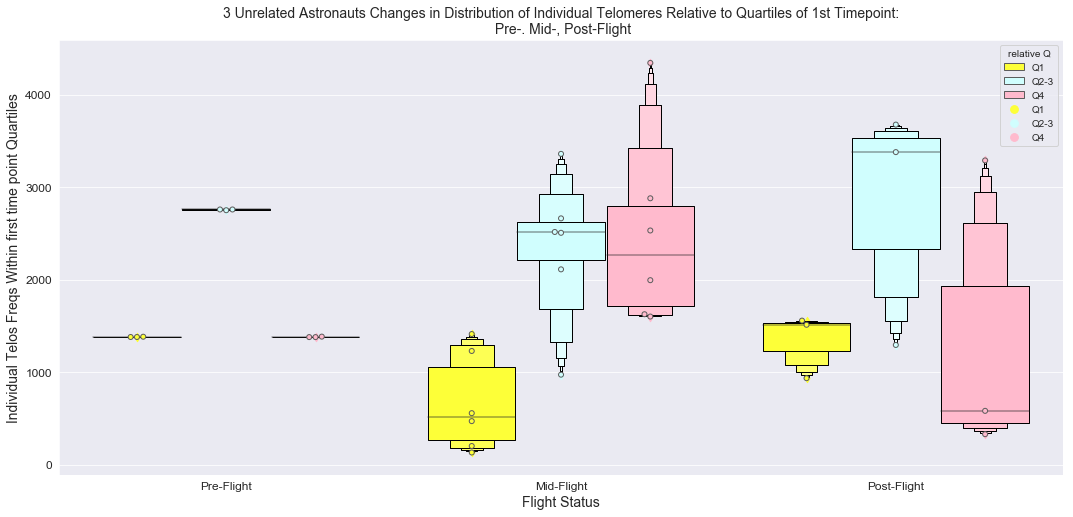

In [40]:
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='flight status', y='Q freq counts', hue='relative Q', data=mid_only_quartiles_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.swarmplot(x='flight status', y='Q freq counts', hue='relative Q', data=mid_only_quartiles_df, palette=palette,
             linewidth=1, color="black", dodge=True)

ax=fig.gca()
ax.set_title('3 Unrelated Astronauts Changes in Distribution of Individual Telomeres Relative to Quartiles of 1st Timepoint:\n Pre-. Mid-, Post-Flight', fontsize=14)
ax.set_xlabel('Flight Status', fontsize=14)
ax.set_ylabel('Individual Telos Freqs Within first time point Quartiles', fontsize=14)

In [41]:
mid_only_quartiles_df['flight status mid split'] = (mid_only_quartiles_df['timepoint']
                                                        .apply(lambda row: telo_ma.mid_split(row)))

Text(0, 0.5, 'Individual Telos Freqs Within first time point Quartiles')

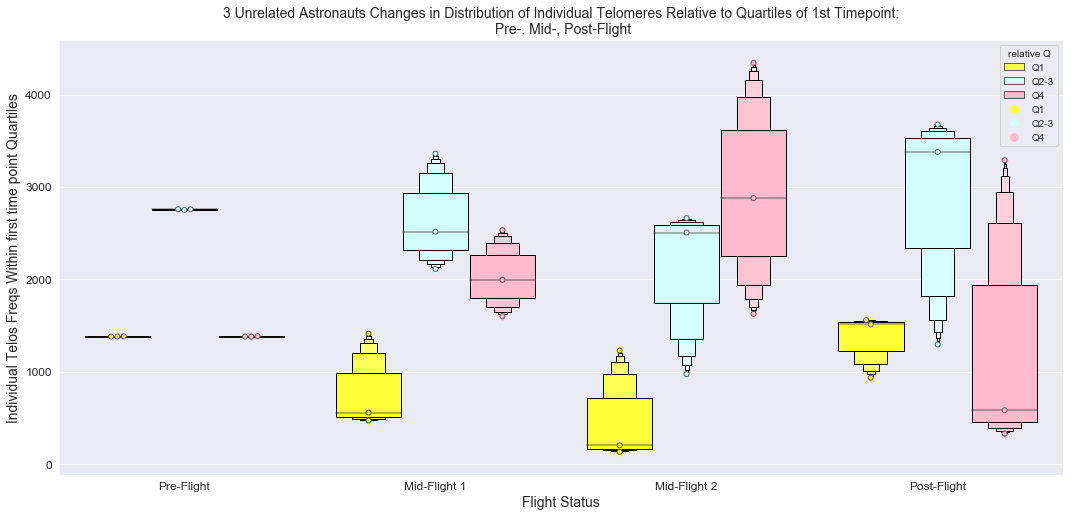

In [42]:
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='flight status mid split', y='Q freq counts', hue='relative Q', data=mid_only_quartiles_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.swarmplot(x='flight status mid split', y='Q freq counts', hue='relative Q', data=mid_only_quartiles_df, palette=palette,
             linewidth=1, color="black", dodge=True)

ax=fig.gca()
ax.set_title('3 Unrelated Astronauts Changes in Distribution of Individual Telomeres Relative to Quartiles of 1st Timepoint:\n Pre-. Mid-, Post-Flight', fontsize=14)
ax.set_xlabel('Flight Status', fontsize=14)
ax.set_ylabel('Individual Telos Freqs Within first time point Quartiles', fontsize=14)

In [43]:
%reload_ext autoreload

## Graphing Individual Telo Distributions all astros - LESS the 3 midflight

In [ ]:
# excluding midflight astros (analyzed above..); just pre/post data
exploded_telos_less_mid_astros_df = exploded_telos_astro_df[
                              (exploded_telos_astro_df['astro id'] != '5163') &
                              (exploded_telos_astro_df['astro id'] != '1536') &
                              (exploded_telos_astro_df['astro id'] != '2171')].copy()

astro_ids2 = list(exploded_telos_less_mid_astros_df['astro id'].unique())

In [84]:
exploded_telos_less_mid_astros_df.head(4)

,astro number,astro id,timepoint,flight status,telo means,telo data exploded
17,3,7673,L-270,Pre-Flight,121.858275,73.933649
18,3,7673,L-180,Pre-Flight,93.908916,155.924171
19,3,7673,L-60,Pre-Flight,103.164494,181.516588
20,3,7673,R+60,Post-Flight,69.229562,54.028436


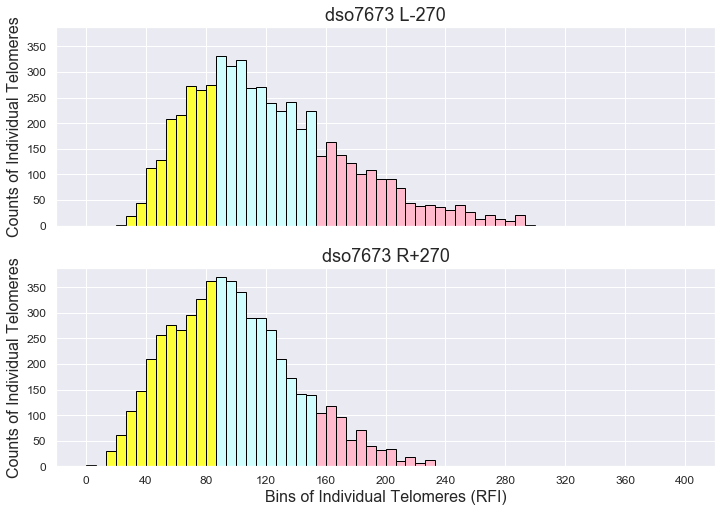

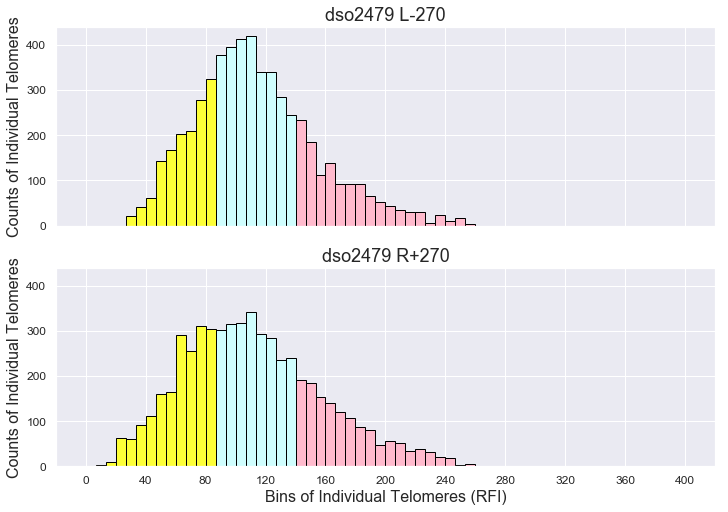

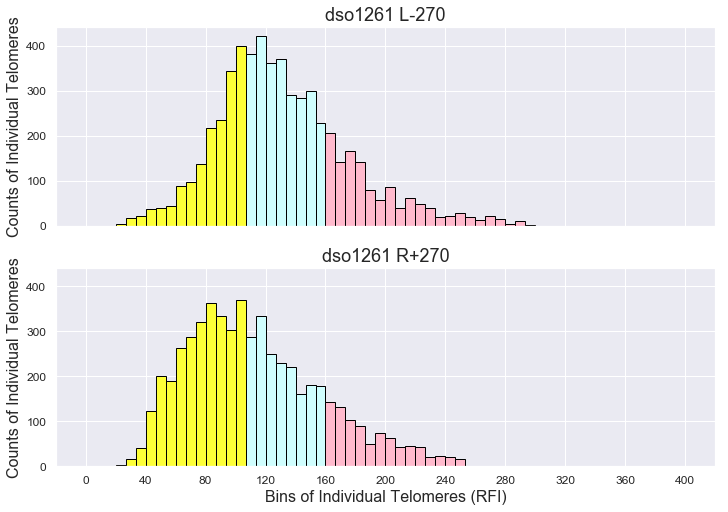

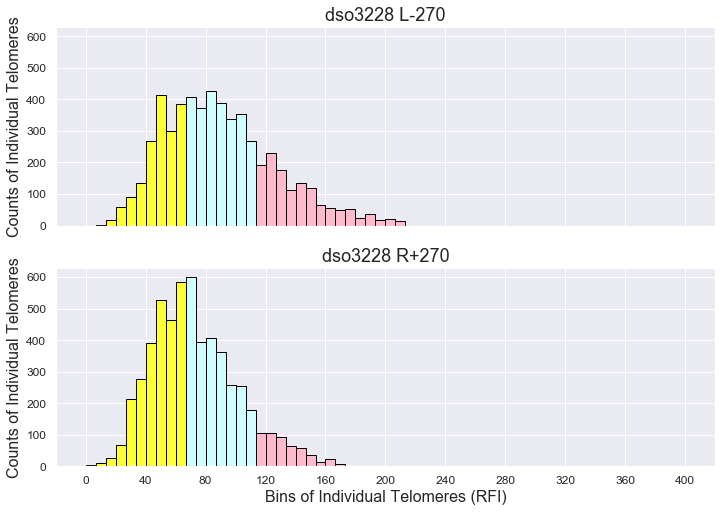

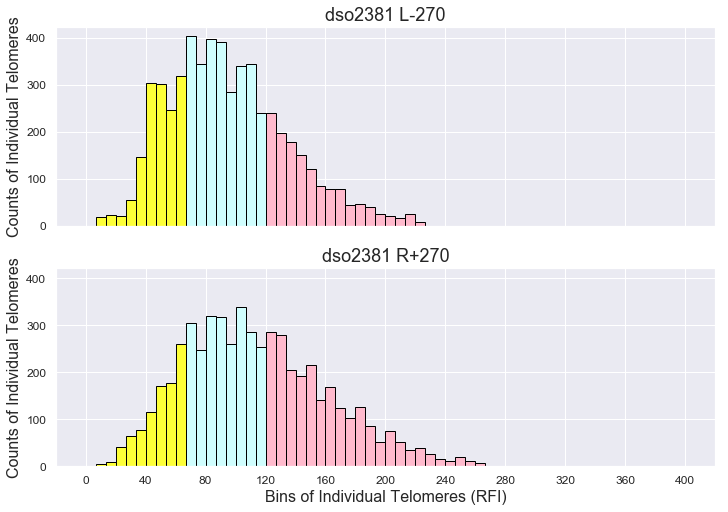

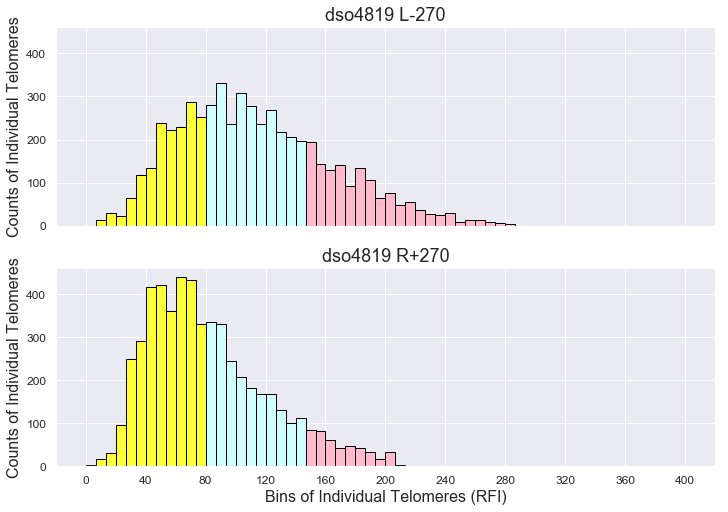

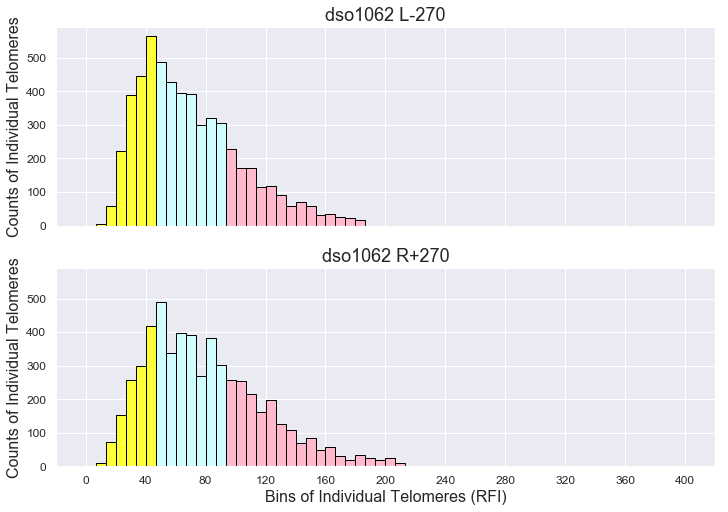

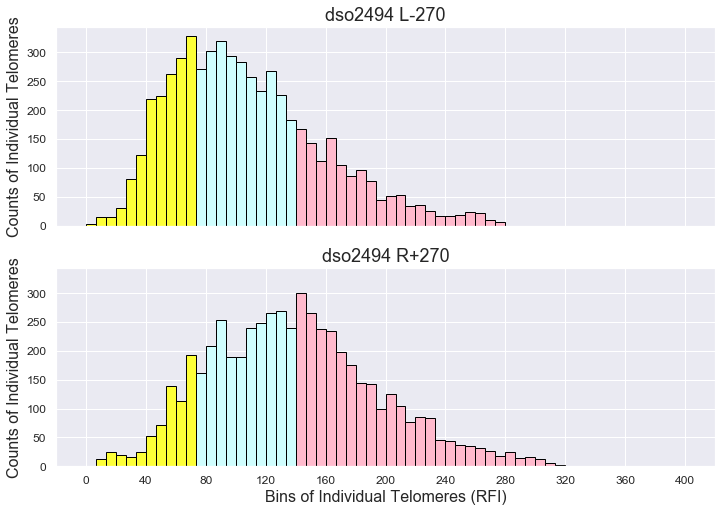

In [102]:
telo_ma.make_histograms_colored_by_quartile_for_astronauts(exploded_telos_less_mid_astros_df, astro_ids2)

In [104]:
grouped_by_astro_id = exploded_telos_less_mid_astros_df.groupby('astro id')

for astro_id in list(exploded_telos_less_mid_astros_df['astro id'].unique()):
    grouped_by_one_astro_id = grouped_by_astro_id.get_group(astro_id)
    
    astro_pre = grouped_by_one_astro_id[grouped_by_one_astro_id['timepoint'] == 'L-270']['telo data exploded']
    astro_post = grouped_by_one_astro_id[grouped_by_one_astro_id['timepoint'] == 'R+270']['telo data exploded']
    
    telo_ma.statistics_between_timepoints_prepost_only(astro_pre, astro_post, f'astro ID {astro_id}: L-270', f'R+270')
    

astro ID 7673: L-270  compared vs  R+270 MannwhitneyuResult(statistic=11325745.0, pvalue=7.0741794150308655e-121) 

astro ID 2479: L-270  compared vs  R+270 MannwhitneyuResult(statistic=14610900.0, pvalue=9.628209380341752e-05) 

astro ID 1261: L-270  compared vs  R+270 MannwhitneyuResult(statistic=11307332.0, pvalue=5.368198318680182e-122) 

astro ID 3228: L-270  compared vs  R+270 MannwhitneyuResult(statistic=11222148.0, pvalue=2.953091147655258e-127) 

astro ID 2381: L-270  compared vs  R+270 MannwhitneyuResult(statistic=11796302.0, pvalue=4.831918865194621e-94) 

astro ID 4819: L-270  compared vs  R+270 MannwhitneyuResult(statistic=9547527.0, pvalue=3.1147747132300456e-253) 

astro ID 1062: L-270  compared vs  R+270 MannwhitneyuResult(statistic=13058296.5, pvalue=5.97065047549006e-39) 

astro ID 2494: L-270  compared vs  R+270 MannwhitneyuResult(statistic=10165225.5, pvalue=1.0413831692098092e-201) 



## Making all controls individual telomere length histogram

In [45]:
all_controls_df = pd.read_csv('../data/compiled data/All_astro_controls_telomere_length_dataframe.csv')
all_controls_df['telo data'] = all_controls_df['telo data'].apply(lambda row: np.array(literal_eval(row)))

all_controls_df.drop('flight status', axis=1, inplace=True)
print(all_controls_df.shape)
all_controls_df.head(4)

(67, 5)


,control id,timepoint,flight status controls,telo data,telo means
0,100,L-270,Pre-Flight,"[92.36551954560642, 118.59338456398262, 97.510...",117.607812
1,100,L-180,Pre-Flight,"[201.0023387905112, 69.27831607083195, 59.1546...",146.984758
2,100,L-60,Pre-Flight,"[155.32910123621784, 169.11125960574674, 108.3...",105.302926
3,100,R+60,Post-Flight,"[160.67490811894422, 140.77848312729702, 149.9...",153.332934


In [46]:
explode_ctrl_telos_raw = all_controls_df['telo data'].apply(pd.Series)
exploded_telos_control_df = (explode_ctrl_telos_raw

    .merge(all_controls_df, right_index = True, left_index = True)                  
    .drop('telo data', axis=1)
    .melt(id_vars = ['control id', 'timepoint', 'flight status controls', 'telo means'], value_name = "telo data exploded") 
    .drop("variable", axis = 1)
    .dropna())

exploded_telos_control_df.shape

(369840, 5)

In [47]:
exploded_telos_control_df = exploded_telos_control_df[(exploded_telos_control_df['timepoint'] != 'R+7') &
                          (exploded_telos_control_df['timepoint'] != 'R+5')]

exploded_telos_control_df['flight status controls'].value_counts()

Pre-Flight     160080
Post-Flight    143520
Mid-Flight      16560
Name: flight status controls, dtype: int64

In [48]:
quartile_reference = exploded_telos_control_df[exploded_telos_control_df['flight status controls'] == 'Pre-Flight']['telo data exploded']
pre_f = exploded_telos_control_df[exploded_telos_control_df['flight status controls'] == 'Pre-Flight']['telo data exploded']
post_f = exploded_telos_control_df[exploded_telos_control_df['flight status controls'] == 'Post-Flight']['telo data exploded']

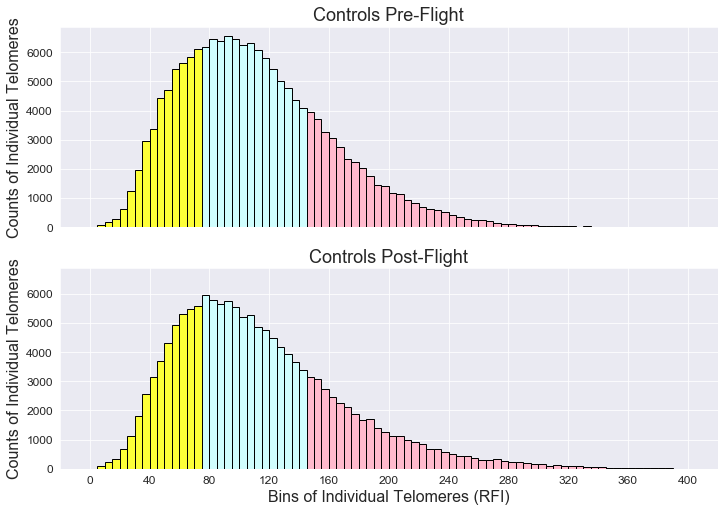

In [49]:
n_bins = 80

telo_ma.graph_two_histograms(quartile_reference, n_bins, pre_f, post_f,
                                       'Controls Pre-Flight', 'Controls Post-Flight', controls=True)

plt.savefig(f'../individual telomere length histogram distributions/png/ALL CONTROLS histogram of individual telomere length distributions.png', dpi=600)
# plt.savefig(f'../individual telomere length histogram distributions/svg/ALL CONTROLS histogram of individual telomere length distributions.svg', format='svg', dpi=1500)

# Urine/Blood Biochemistry Data (n=11)
___

## Reading urine analyte data (n=11) & merging with telo data

In [50]:
### need to try block regression instead of plots 

# interleukins
# chemokines
# inflammatory 

In [51]:
melt_urine_biochem_data = pd.read_csv('../data/compiled and processed data/melt_urine_biochem_data.csv')
melt_urine_biochem_data.head(4)

,biochemistry analyte,sample type,timepoint,measurement,flight status,measured analyte
0,"8-OHdG, Urine ug/gCr",urine,Pre,2.6 ± 1,Pre-Flight,2.60
1,"Copper, Urine umol/day",urine,Pre,0.28 ± 0.17,Pre-Flight,0.28
2,PGF2-alpha ng/mg Cr,urine,Pre,1.84 ± 1.2,Pre-Flight,1.84
3,"Selenium, Urine umol/day",urine,Pre,1.02 ± 0.39,Pre-Flight,1.02


In [52]:
astro_telos_per_cell_df.head(4)

,astro number,astro id,timepoint,flight status,telo means,telo data per cell
0,1,5163,L-270,Pre-Flight,0.759254,0.664872
1,1,5163,L-180,Pre-Flight,0.873811,0.850029
2,1,5163,L-60,Pre-Flight,1.101363,1.208992
3,1,5163,FD90,Mid-Flight,0.870739,0.823925


In [53]:
# grouping astronaut data by flight status and taking mean

trim_astro_df = astro_telos_per_cell_df.drop(['astro number', 'astro id', 'telo data per cell',], axis=1)
group_astros_telos = trim_astro_df.groupby('flight status').agg('mean').reset_index()
group_astros_telos

,flight status,telo means
0,Mid-Flight,1.212613
1,Post-Flight,0.922262
2,Pre-Flight,0.938117


In [54]:
# merging analyes (not grouped as mean per flight status), astro telos grouped as mean per flight status
merge_urine_telos = melt_urine_biochem_data.merge(group_astros_telos, on='flight status')

In [55]:
merge_urine_telos.rename(columns={'telo means':'Mean Telomere Length'}, inplace=True)
merge_urine_telos.head(4)

,biochemistry analyte,sample type,timepoint,measurement,flight status,measured analyte,Mean Telomere Length
0,"8-OHdG, Urine ug/gCr",urine,Pre,2.6 ± 1,Pre-Flight,2.60,0.938117
1,"Copper, Urine umol/day",urine,Pre,0.28 ± 0.17,Pre-Flight,0.28,0.938117
2,PGF2-alpha ng/mg Cr,urine,Pre,1.84 ± 1.2,Pre-Flight,1.84,0.938117
3,"Selenium, Urine umol/day",urine,Pre,1.02 ± 0.39,Pre-Flight,1.02,0.938117


## Correlations between Urine Analytes & Mean Telomere Length (n=11)

In [56]:
# analytes retaining blood draw day correlated w/ mean telo length (pre, mid, post); provides more timepoints for corr

grouped_analytes = merge_urine_telos.groupby('biochemistry analyte')

for group in list(merge_urine_telos['biochemistry analyte'].unique()):
    print( f"{group}: {grouped_analytes.get_group(group).corr()['Mean Telomere Length'][0]:.4f}" ) 

8-OHdG, Urine ug/gCr: 0.7791
Copper, Urine umol/day: -0.5622
PGF2-alpha ng/mg Cr: 0.8966
Selenium, Urine umol/day: 0.8530


## Graphing urine biochemistry analyte correlations with telomere length (n=11)

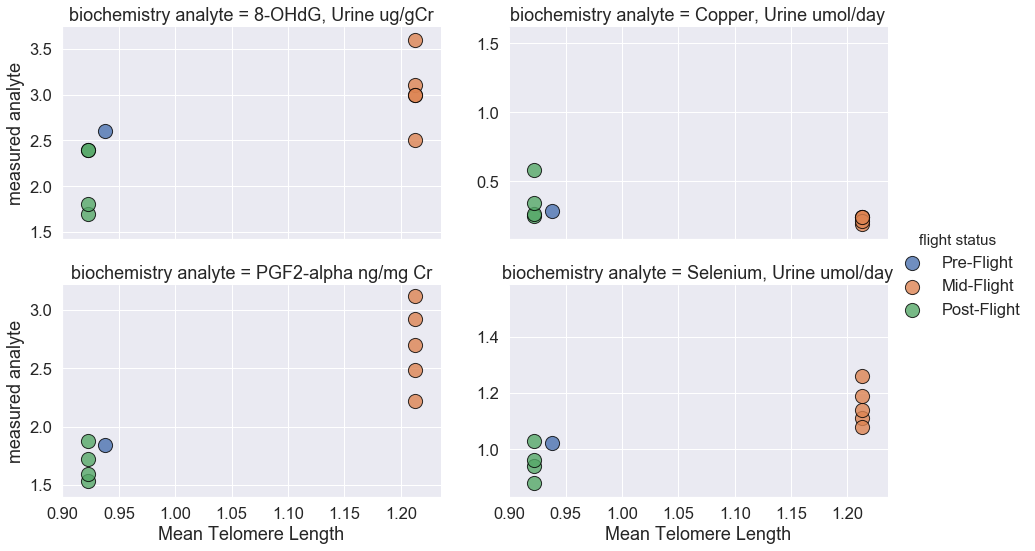

In [57]:
ax = sns.set(font_scale=1.5)
ax = sns.lmplot(x='Mean Telomere Length', y='measured analyte', hue='flight status', 
                col='biochemistry analyte', col_wrap=2,
                data=merge_urine_telos,
                sharex=True,
                sharey=False,
                fit_reg=False, scatter_kws={'s':200, 'edgecolor':'black', 'linewidth':1},
                height=4, aspect=1.6,
                hue_order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'],
          )

# ax.savefig('graph data/biochemistry correlations/scatterplot correlations urine analytes mean telomere length.png', dpi=400)

## Reading in blood analyte data (n=11) & merging with telo data

In [58]:
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
melt_blood_biochem_data = pd.read_csv('../data/compiled and processed data/melt_blood_biochem_data.csv')
melt_blood_biochem_data.head(4)

,biochemistry analyte,sample type,timepoint,measurement,flight status,measured analyte
0,CCL2/MCP-1 pg/ml,blood,Pre,83 ± 17,Pre-Flight,83.0
1,CCL3/MIP-1a pg/ml,blood,Pre,438 ± 194,Pre-Flight,438.0
2,CCL4/MIP1B pg/ml,blood,Pre,54 ± 17,Pre-Flight,54.0
3,CCL5/RANTES pg/ml,blood,Pre,6902 ± 4393,Pre-Flight,6902.0


In [60]:
astro_telos_per_cell_df.head(4)

,astro number,astro id,timepoint,flight status,telo means,telo data per cell
0,1,5163,L-270,Pre-Flight,0.759254,0.664872
1,1,5163,L-180,Pre-Flight,0.873811,0.850029
2,1,5163,L-60,Pre-Flight,1.101363,1.208992
3,1,5163,FD90,Mid-Flight,0.870739,0.823925


In [61]:
blood_n11_drop_rows_all_status = telo_ma.correlate_astro_analytes_telomeres_pipeline(analyte_df=melt_blood_biochem_data, 
                                                                                     telomere_df=astro_telos_per_cell_df, 
                                                  astro_ids_of_interest='all astros',
                                                  how_drop_missing='by melted row', 
#                                                   retain_what_flight_status=['Pre-Flight', 'Mid-Flight', 'Post-Flight'])
                                                  retain_what_flight_status='require at least one per status',
                                                  telos_percent_change='no')
print(blood_n11_drop_rows_all_status.shape)

(222, 6)


In [62]:
test = blood_n11_drop_rows_all_status.groupby(['biochemistry analyte', 'timepoint']).agg('mean').reset_index()

test['timepoint'] = test['timepoint'].astype('category')
test['timepoint'].cat.reorder_categories(['Pre', 'FD15', 'FD30', 'FD60', 'FD120', 'FD180', 'R+0', 'R+180'], inplace=True)

alpha2 = test[test['biochemistry analyte'] == 'CXCL5/ENA-78 pg/ml'].copy()
test[test['biochemistry analyte'] == 'CXCL5/ENA-78 pg/ml']

,biochemistry analyte,timepoint,measured analyte,Mean Telomere Length
32,CXCL5/ENA-78 pg/ml,FD120,1009.0,1.212613
33,CXCL5/ENA-78 pg/ml,FD15,1233.0,1.212613
34,CXCL5/ENA-78 pg/ml,FD180,919.0,1.212613
35,CXCL5/ENA-78 pg/ml,FD30,1005.0,1.212613
36,CXCL5/ENA-78 pg/ml,FD60,1144.0,1.212613
37,CXCL5/ENA-78 pg/ml,Pre,275.0,0.938117
38,CXCL5/ENA-78 pg/ml,R+0,93.0,0.922262
39,CXCL5/ENA-78 pg/ml,R+180,134.0,0.922262


## Experimental visualizations of analytes vs. mean telomere length 

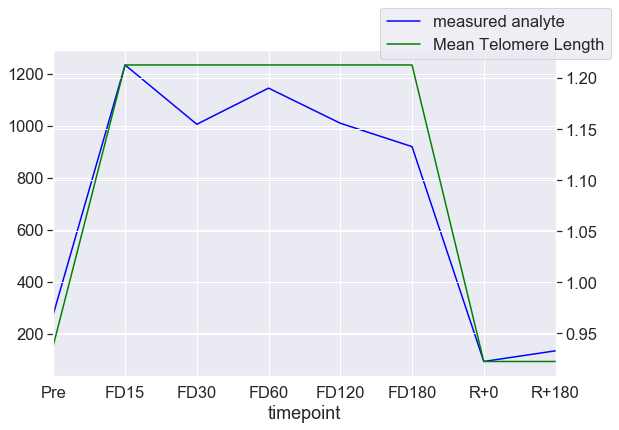

In [63]:
timepoint_order = ['Pre', 'FD15', 'FD30', 'FD60', 'FD120', 'FD180', 'R+0', 'R+180']
df = alpha2.set_index('timepoint').loc[timepoint_order]

ax = df.plot(y='measured analyte', kind="line", legend=False, figsize = (9,6), color='blue')
ax2 = ax.twinx()
df.plot(y='Mean Telomere Length', kind="line", legend=False, figsize = (9,6), ax=ax2, color='green')

# alpha.plot(x='timepoint', y='Mean Telomere Length', ax=ax2, legend=False, color="r")
ax.figure.legend(loc='upper right')

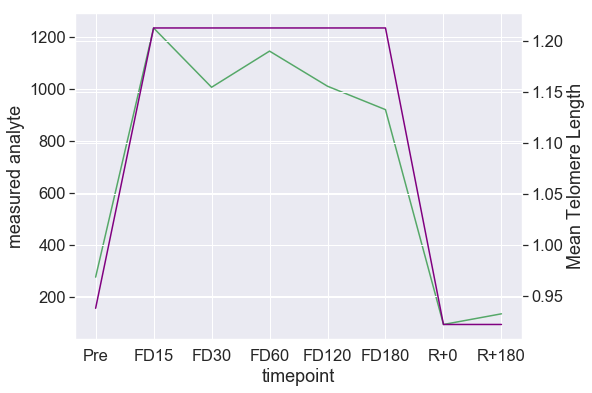

In [65]:
plt.figure(figsize=(8,6))
ax = sns.set(font_scale=1.5)

ax = sns.lineplot(x='timepoint', y='measured analyte', color='g', data=alpha2, 
             markers=True, dashes=True,)
ax2 = plt.twinx()
sns.lineplot(x='timepoint', y='Mean Telomere Length', color='purple', data=alpha2, ax=ax2,
            markers=True, dashes=True,)

## Correlations between Blood Analytes & Mean Telomere Length (n=11)

In [66]:
corr_value_tests = telo_ma.find_high_correlates_analytes_mean_telos(blood_n11_drop_rows_all_status, 0, corr_loc=0)

CCL2/MCP-1 pg/ml: -0.3946
CCL3/MIP-1a pg/ml: 0.8940
CCL4/MIP1B pg/ml: 0.8405
CCL5/RANTES pg/ml: 0.9626
CXCL5/ENA-78 pg/ml: 0.9771
Ferritin ng/mL: 0.7273
FGF Basic Immune Lab pg/ml: 0.9034
Folate, Serum nmol/L: -0.6210
G-CSF pg/ml: 0.5289
GGT U/L: -0.0248
GM-CSF pg/ml: 0.8744
Hepcidin-25 Bioactive ng/mL: 0.4476
hs CRP mg/L: -0.5899
IL-1 beta Immune Lab pg/ml: 0.9106
IL-17 pg/ml: 0.9227
IL-1a pg/ml: 0.8215
IL-1ra pg/ml: 0.4664
IL-2 pg/ml: 0.8787
IL-4 pg/ml: 0.9314
IL-6 pg/ml: -0.8530
Iron, Serum  ug/dL: 0.7317
Selenium, Serum umol/L: 0.0237
Total Antioxidant Capacity mmol/L: 0.5643
Transferrin mg/dL: -0.2068
Transferrin Receptors ug/mL: -0.5137
VEGF-1 Immune Lab pg/ml: 0.8626
Vitamin B12 pmol/L: 0.3867
Zinc, Serum umol/L: 0.7774


In [67]:
blood_n11_high_corr_values = pd.DataFrame(corr_value_tests, columns=['biochemistry analyte', 'correlation value'])
blood_n11_high_corr_values.head(6)

,biochemistry analyte,correlation value
0,CCL2/MCP-1 pg/ml,-0.394579
1,CCL3/MIP-1a pg/ml,0.893982
2,CCL4/MIP1B pg/ml,0.840465
3,CCL5/RANTES pg/ml,0.962619
4,CXCL5/ENA-78 pg/ml,0.977092
5,Ferritin ng/mL,0.727328


## Graphing Blood (n=11) correlations with Telomere Length

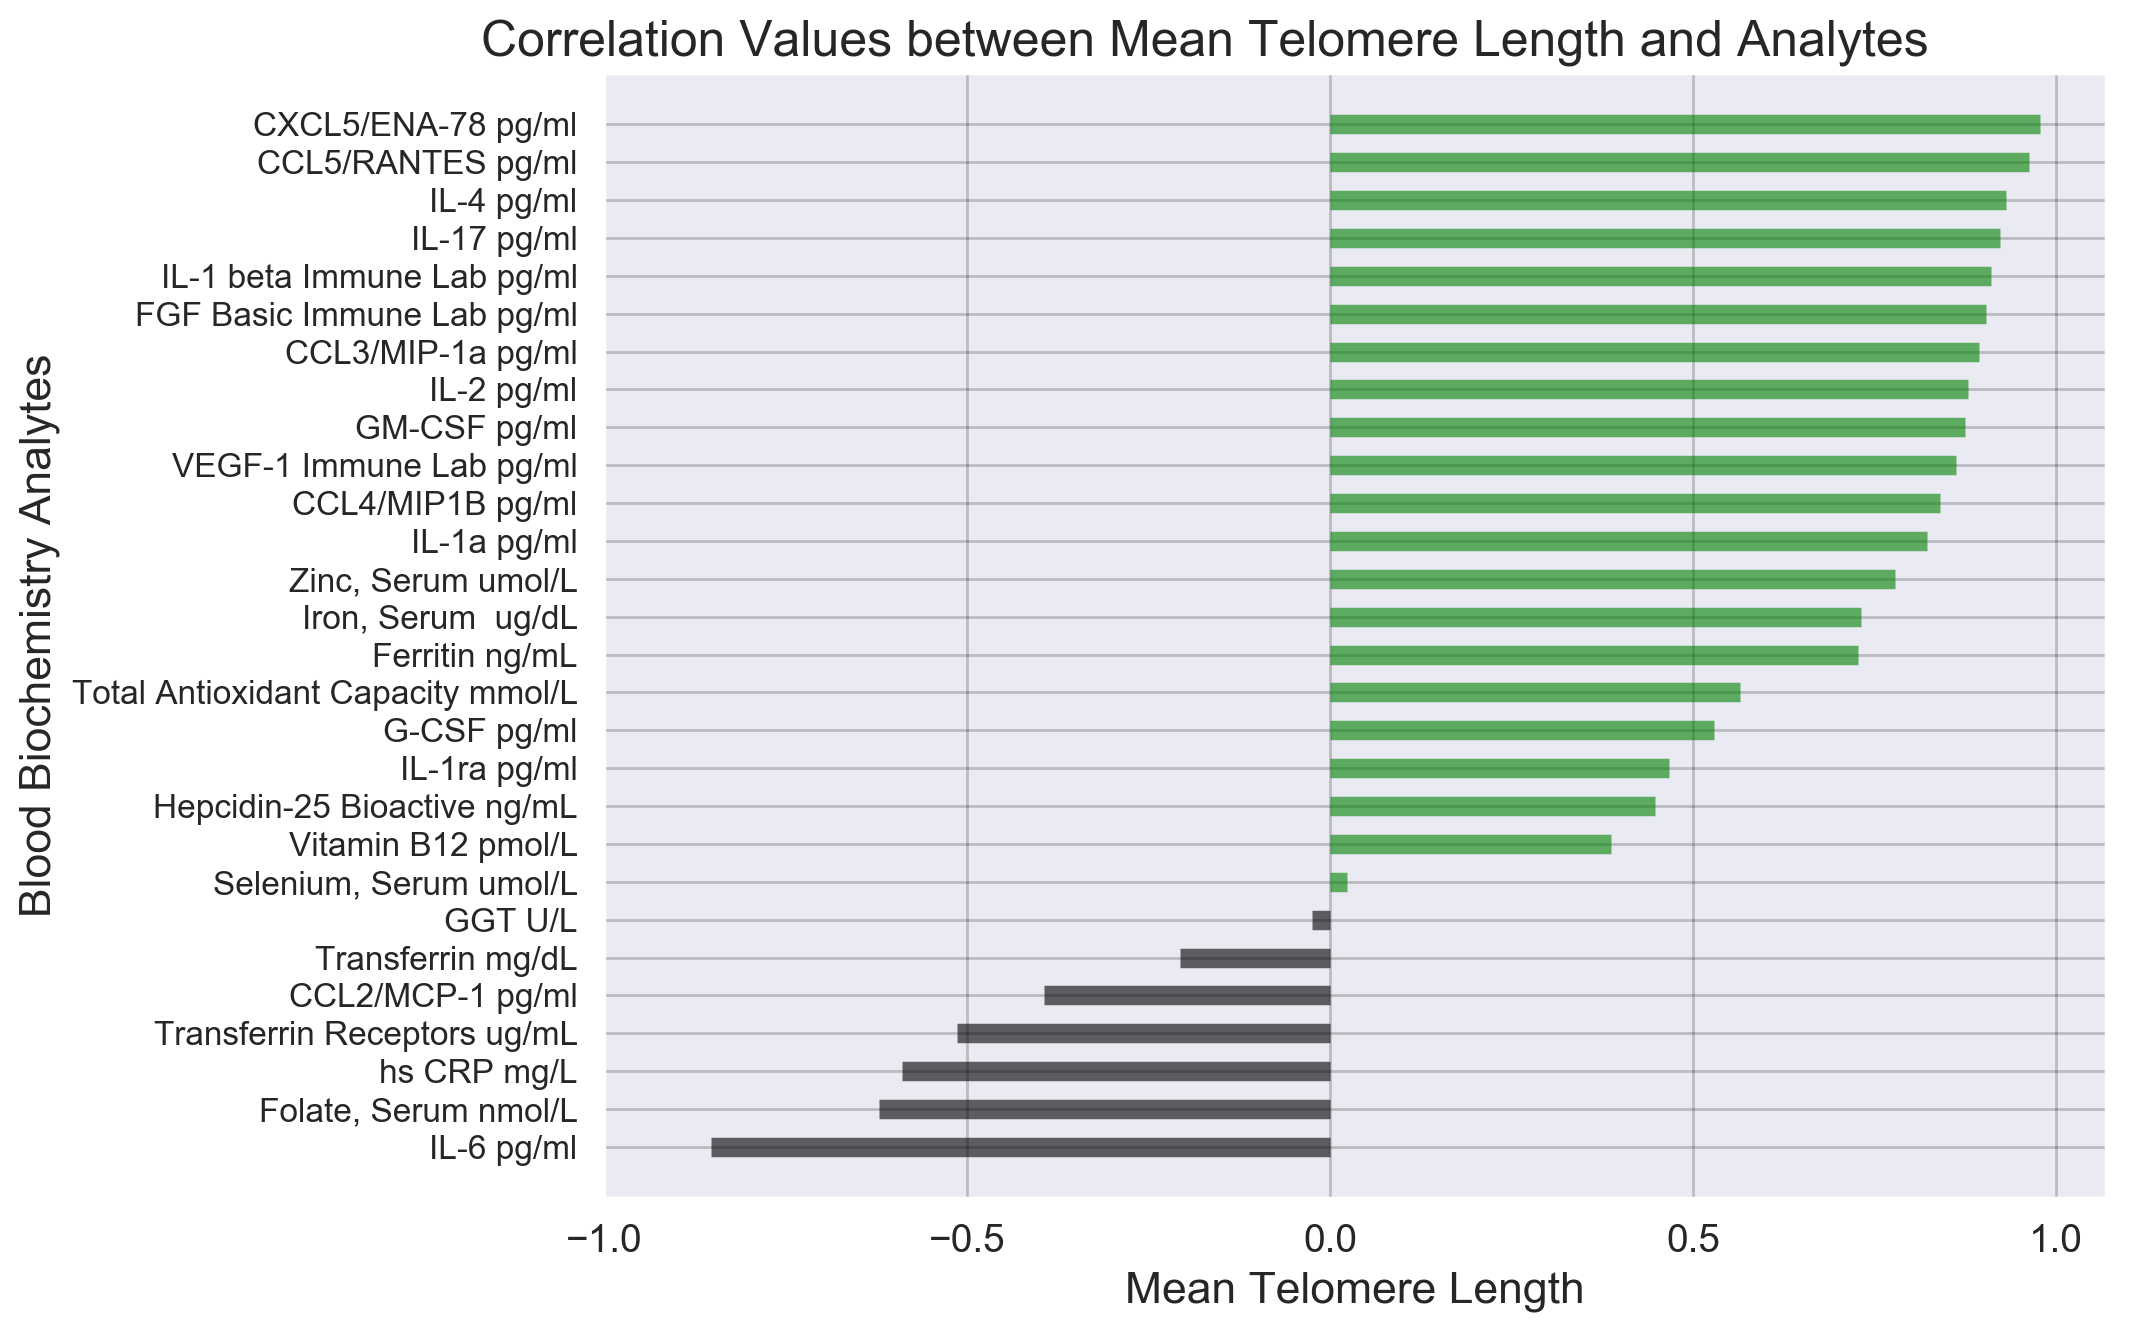

In [68]:
df = blood_n11_high_corr_values
x = df['correlation value']
df['colors'] = ['black' if x < 0 else 'green' for x in df['correlation value']]
df.sort_values('correlation value', inplace=True)
df.reset_index(inplace=True, drop=True)

plt.figure(figsize=(11,7), dpi= 200)
plt.hlines(y=df.index, xmin=0, xmax=df['correlation value'], color=df['colors'], alpha=0.6, linewidth=7,
          )

# Decorations
plt.yticks(df.index, df['biochemistry analyte'], fontsize=12)
plt.xticks(fontsize=14)
plt.xlabel('Mean Telomere Length', fontsize=16)
plt.ylabel('Blood Biochemistry Analytes', fontsize=16)
plt.title('Correlation Values between Mean Telomere Length and Analytes', 
          x=0.4, fontdict={'size':18})

plt.grid(linestyle='-', alpha=.2, color='black')
plt.tight_layout()
my_xticks = np.array([-1, -.5, 0, .5, 1])
plt.xticks(my_xticks[::1])
plt.savefig('test graph correlating blood analytes mean telomere length n=11.png')

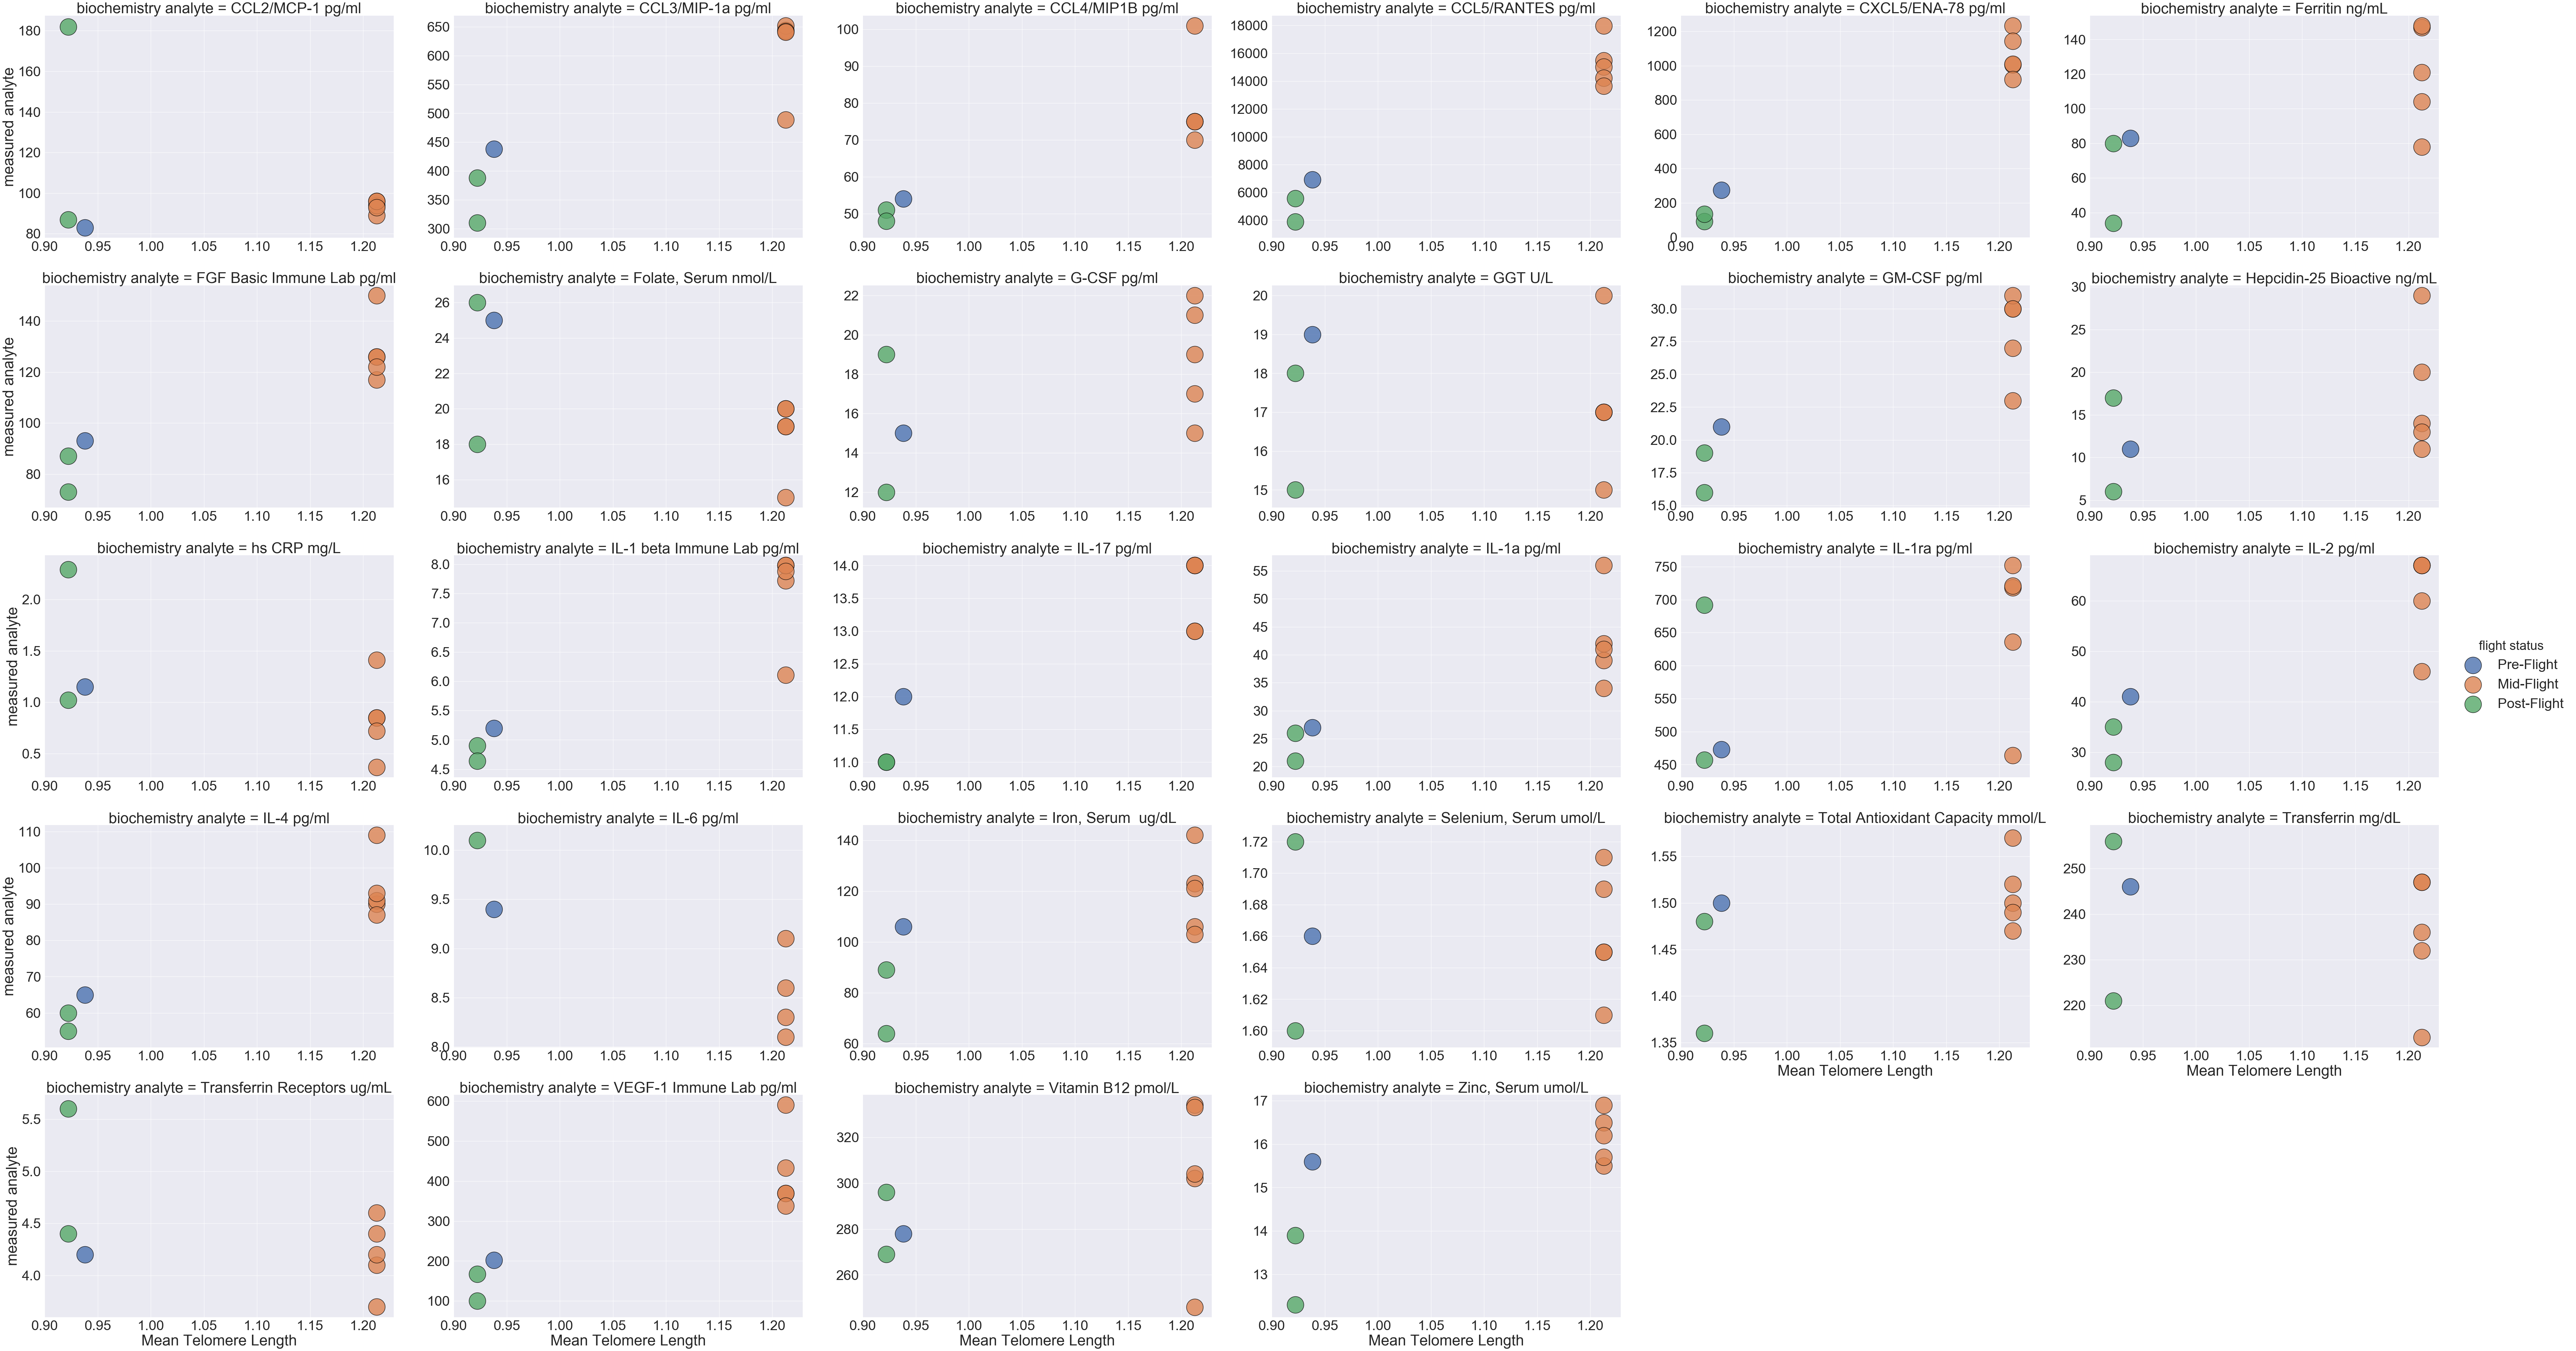

In [69]:
ax = sns.set(font_scale=3.6)
ax = sns.lmplot(x='Mean Telomere Length', y='measured analyte', hue='flight status', 
                col='biochemistry analyte', col_wrap=6,
                data=blood_n11_drop_rows_all_status,
                sharey=False,
                sharex=False,
                fit_reg=False,
                hue_order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'],
                scatter_kws={'s':2300, 'edgecolor':'black', 'linewidth':1.5},
                height=11, aspect=1.5,
          )
# plt.tight_layout()
# plt.show()
ax.savefig('graph data/biochemistry correlations/scatterplot correlations blood analytes mean telomere length.png')